In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as st

from sklearn.linear_model import LinearRegression
from datetime import datetime 

In [2]:
data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
display(data)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,267,276,284,291,315,328,346,346,346,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,713,713,714,715,717,719,719,720,721,724
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1118,1128,1158,1190,1221,1240,1248,1265,1284,1297
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,272,272,303,303,303,309,309,311,311,311
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,5849,5900,5900,6005,6058,6058,6159,6213,6262,6315


In [3]:
data[data[""]].loc[:,"3/31/20"]

0      174
1      243
2      716
3      376
4        7
      ... 
261      0
262      0
263      0
264      0
265      0
Name: 3/31/20, Length: 266, dtype: int64

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,108,108,108,108,108,108,108,108,108,111
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3184,3189,3203,3211,3211,3405,3419,3429,3433,3440
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,29,29,29,30,30,30,30,30,30,30
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1067,1067,1067,1067,1067,1067,1067,1067,1068,1068
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,440,443,443,443,443,443,443,443,443,443
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,228,228,228,228,228,228,228,228,228,228
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,2099,2159,2231,2303,2368,2368,2536,2660,2824,2942
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,609,611,611,611,611,611,612,618,621,624


   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
8        0        0        0        0        0        0        0        0   
9        0        0        0        0        3        4        4        4   

   1/30/20  1/31/20  ...  6/28/20  6/29/20  6/30/20  7/1/20  7/2/20  7/3/20  \
8        0        0  ...      108      108      108     108     108     108   
9        4        4  ...     3184     3189     3203    3211    3211    3405   

   7/4/20  7/5/20  7/6/20  7/7/20  
8     108     108     108     111  
9    3419    3429    3433    3440  

[2 rows x 168 columns]


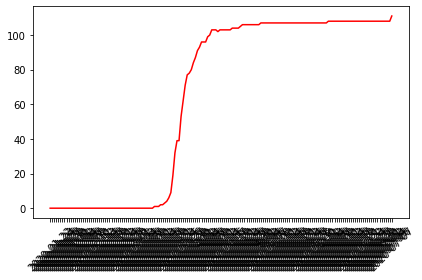

In [3]:
japan = data[data["Country/Region"] == "Australia"]
display(japan)
time_ser = japan.iloc[:2,4:]
#display(list(time_ser.iloc[0]))
fig, ax = plt.subplots()
fig.canvas.draw()
print(time_ser)
col = time_ser.iloc[0]
dates=list(time_ser)
date_object = datetime.strptime(dates[0], '%m/%d/%y')
x_values = [datetime.strptime(str(d),"%m/%d/%y").date() for d in dates]

plt.plot(dates, col, c = "red")

ax.set_xticklabels(x_values, rotation=45)
plt.tight_layout()

plt.show()


In [27]:
act = japan.iloc[:1,:]
i = 1
last = 108
now = 0
while True:
    
   # print(i)
    now = act.iloc[0,-1*i]
   # print(now,last)
    if now < last:
        display(act.iloc[:,:(-i+2)])
        break
    i+=1
    

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,108


In [5]:
da = pd.read_csv("csse_covid_19_data/csse_covid_19_daily_reports/07-07-2020.csv")
au = da[da["Country_Region"] == "Australia"]
display(au)
T_R=sum(list(da["Recovered"]))
T_D=sum(list(da["Deaths"]))
T_C=sum(list(da["Confirmed"]))
AU_R=sum(list(au["Recovered"]))
AU_D=sum(list(au["Deaths"]))

AU_A=sum(list(au["Active"]))
AU_C=sum(list(au["Confirmed"]))
print("Confirmed in AU: ",sum(list(au["Confirmed"])))
print("Recovered in AU: ",sum(list(au["Recovered"])))
print("Deaths in AU:    ",sum(list(au["Deaths"])))
print("Total Confirmed: ",sum(list(da["Confirmed"])))
print("Total Recovered: ",sum(list(da["Recovered"])))
print("Total Deaths:    ",sum(list(da["Deaths"])))
print("Total Active:    ",sum(list(da["Active"])))
print("Recover Rate:    ",np.round(T_R*100/T_C,3),"%")
print("Deaths Rate:     ",np.round(T_D*100/T_C,3),"%")
print("AU Recover Rate: ",np.round(AU_R*100/AU_C,3),"%")
print("AU Active Rate:  ",np.round(AU_A*100/AU_C,3),"%")   
print("AU Deaths Rate:  ",np.round(AU_D*100/AU_C,3),"%")        

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3162,NaN,NaN,Australian Capital Territory,Australia,2020-07-08 05:33:48,-35.4735,149.0124,111,3,105,3.0,"Australian Capital Territory, Australia",25.928521,2.702703
3423,NaN,NaN,New South Wales,Australia,2020-07-08 05:33:48,-33.8688,151.2093,3440,49,2986,405.0,"New South Wales, Australia",42.374969,1.424419
3435,NaN,NaN,Northern Territory,Australia,2020-07-08 05:33:48,-12.4634,130.8456,30,0,29,1.0,"Northern Territory, Australia",12.214984,0.000000
3484,NaN,NaN,Queensland,Australia,2020-07-08 05:33:48,-27.4698,153.0251,1068,6,1056,6.0,"Queensland, Australia",20.877725,0.561798
3542,NaN,NaN,South Australia,Australia,2020-07-08 05:33:48,-34.9285,138.6007,443,4,436,3.0,"South Australia, Australia",25.220609,0.902935
3555,NaN,NaN,Tasmania,Australia,2020-07-08 05:33:48,-42.8821,147.3272,228,13,215,0.0,"Tasmania, Australia",42.577031,5.701754
3605,NaN,NaN,Victoria,Australia,2020-07-08 05:33:48,-37.8136,144.9631,2942,22,2058,862.0,"Victoria, Australia",44.374727,0.747791
3616,NaN,NaN,Western Australia,Australia,2020-07-08 05:33:48,-31.9505,115.8605,624,9,602,13.0,"Western Australia, Australia",23.720824,1.442308


Confirmed in AU:  8886
Recovered in AU:  7487
Deaths in AU:     106
Total Confirmed:  11829602
Total Recovered:  6447656
Total Deaths:     544163
Total Active:     nan
Recover Rate:     54.504 %
Deaths Rate:      4.6 %
AU Recover Rate:  84.256 %
AU Active Rate:   14.551 %
AU Deaths Rate:   1.193 %
